In the following we will look at a basic implementation of a very simple version of a neural network. As we now the basic ideas, we will look at how to perform calculations with two nodes and a hidden layer. The main purpose of neural networks on the basic level is to account for interactions, that are not modeled in simple linear models
<div>
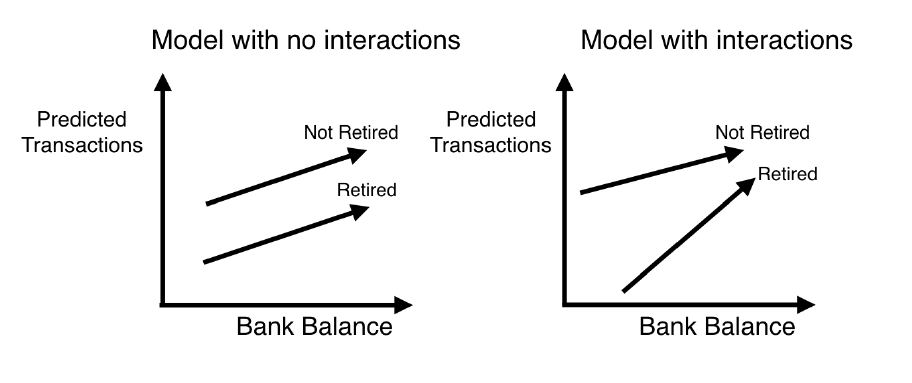
</div>
So we will get a model that looks like this:
<div>
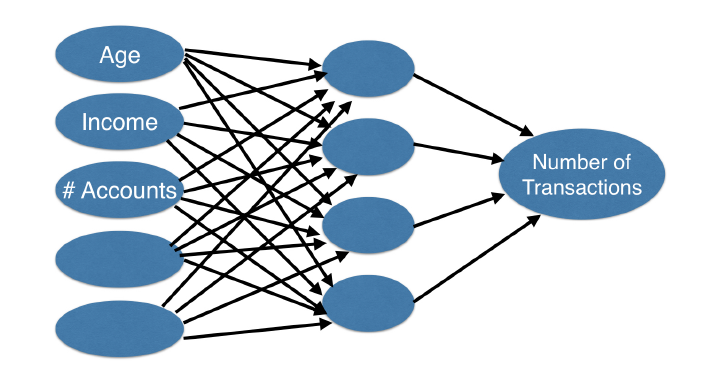
</div>
We need to model hoe the input values in the first layer are transformed into an output prediction through various steps.
We will work out the following simple example:
<div>
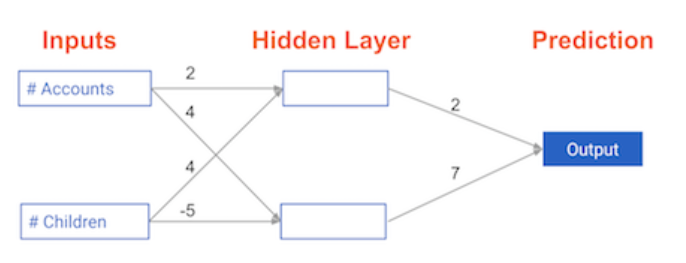
</div>

The following material is used from the DataCamp course 'Introduction to Deep Learning in Python'

In [1]:
# Here are the important libraries
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classification performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Grid search
from sklearn.model_selection import GridSearchCV

In [3]:
# The first step is to specifythe weight structure
# As we only work out the details for one example, we can choose the most convenient way for a one-off calculation
# In this case that would be a dictionart
# We need the wegihts to combine the values at node_1 and node_2 in the hidden layer and the output node

weights = { 'node_0': np.array([2,4]),
            'node_1': np.array([4, -5]),
            'output': np.array([2,7])}

# And let's assume the two input values for Accounts and Children are 3 and 5

input_data = np.array([3,5])

In [4]:
# The value in node_1 in the hidden layer will be the corresponding weighted average summed for the input values
# 2*3 + 4*5 = 26

node_0_value = (weights['node_0'] * input_data).sum()

# Similar idea for node_2: 4 * 3 - 5 * 5 = -13 
node_1_value = (weights['node_1'] * input_data).sum()

# And combining these in an array will give the values in the hidden layer

hidden_layer = np.array([node_0_value, node_1_value])

hidden_layer

array([ 26, -13])

In [5]:
# Finally, supposing at this moment that there is extra functional transformation,
# We can determine the output as the weighted sum of the above calculated hidden layer values and output weights

output = (weights['output'] * hidden_layer).sum()

output

-39

In [6]:
# We can create a simple function for this

def basic_nn(input_data, weights):
    # Hidden layer calculations
    node_0_value = (weights['node_0'] * input_data).sum()
    node_1_value = (weights['node_1'] * input_data).sum()
    hidden_layer = np.array([node_0_value, node_1_value])
    # Output calculations
    output = (weights['output'] * hidden_layer).sum()
    return output

In [7]:
basic_nn(np.array([3,5]), { 'node_0': np.array([2,4]),'node_1': np.array([4, -5]),'output': np.array([2,7])})

-39

In order to incorporate non-linear behaviour, we need to use some kind of activation function that transforms the results of the weighted sum calculations. There are several popular choices for this, for example the relu function

<div>
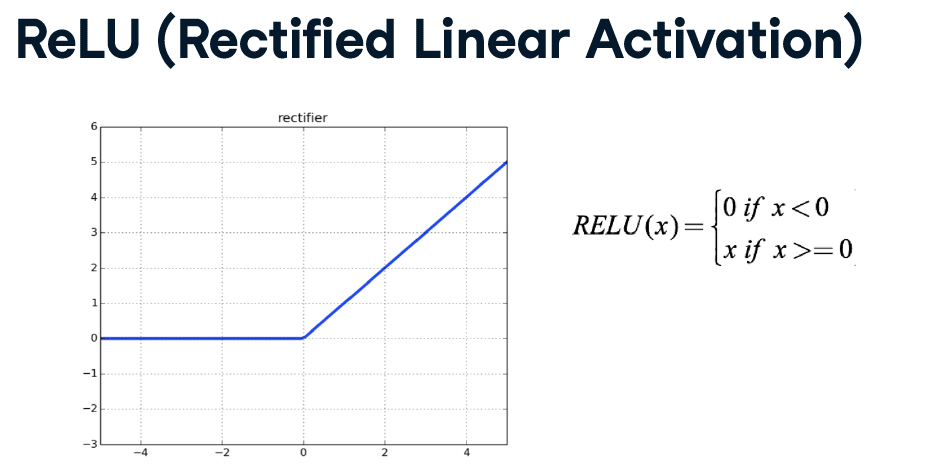
</div>
or the softmax function
<div>
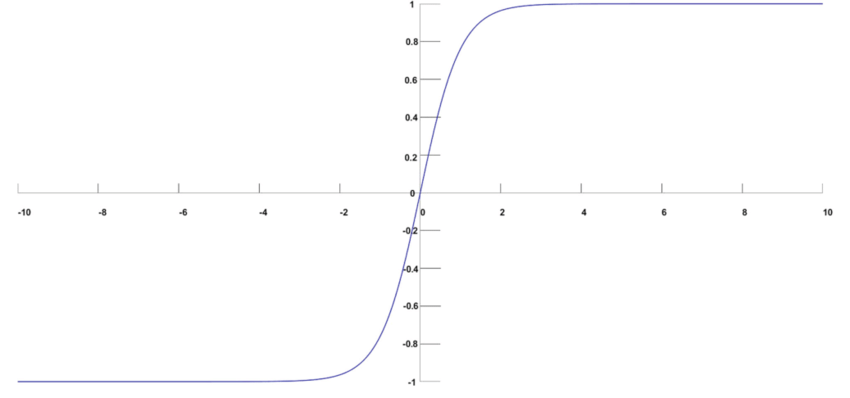
</div>

In [8]:
# We can create a simple relu function: the maximum of the value and 0

def relu(input):
    """ Calculate the maximum of the input value and 0"""
    output = max(input, 0)
    return(output)

# We can modify the basic version of nn by transforming the results of weighted sum calculations with relu
def basic_nn_relu(input_data, weights):
    # Hidden layer calculations
    node_0_value = relu((weights['node_0'] * input_data).sum())
    node_1_value = relu((weights['node_1'] * input_data).sum())
    hidden_layer = np.array([node_0_value, node_1_value])
    # Output calculations
    output = relu((weights['output'] * hidden_layer).sum())
    return output

In [9]:
# We can calculate for the same example
basic_nn_relu(np.array([3,5]), { 'node_0': np.array([2,4]),'node_1': np.array([4, -5]),'output': np.array([2,7])})

52

In [10]:
# If we have multiple data points, we can simply iterate over, apply the create function and collect the outputs
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

# Create empty list to storeoutput
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(basic_nn_relu(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


To obtain an even more complex basic model, we can extend the calculations with extra hidden layers
<div>
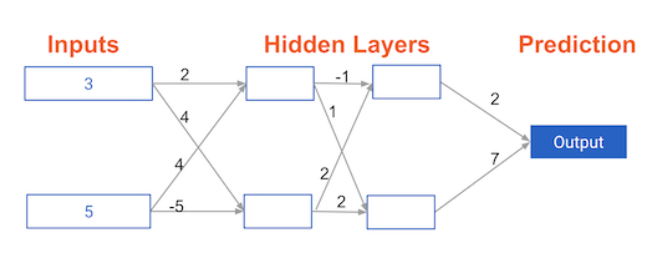
</div>

In [11]:
# We can modify the above function to repeat the calculations 

def basic_nn_relu_multilayer(input_data, weights):
    # First hidden layer calculations
    node_0_0_value = relu((weights['node_0_0'] * input_data).sum())
    node_0_1_value = relu((weights['node_0_1'] * input_data).sum())
    hidden_1 = np.array([node_0_0_value, node_0_1_value])

    # Calculations for second layer
    node_1_0_value = relu((weights['node_1_0'] * hidden_1).sum())
    node_1_1_value = relu((weights['node_1_1'] * hidden_1).sum())
    hidden_2 = np.array([node_1_0_value, node_1_1_value])
    
    # Output calculations for first layer
    output = relu((weights['output'] * hidden_2).sum())
    return output


In [12]:
# Try with an example

weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

input_data = np.array([3, 5])

basic_nn_relu_multilayer(input_data, weights)

182

So we know the basic calculations, and as we know the point of neural networks is to try changing the weight until the output matches a given target value. So for example we can have this situations:

<div>
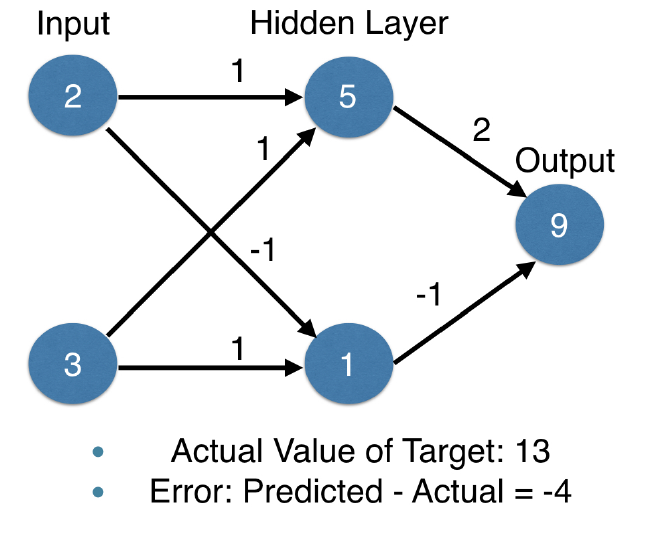
</div>

In this case, supposing we have only this point, we can optimize the output by changing the weights in the last step

<div>
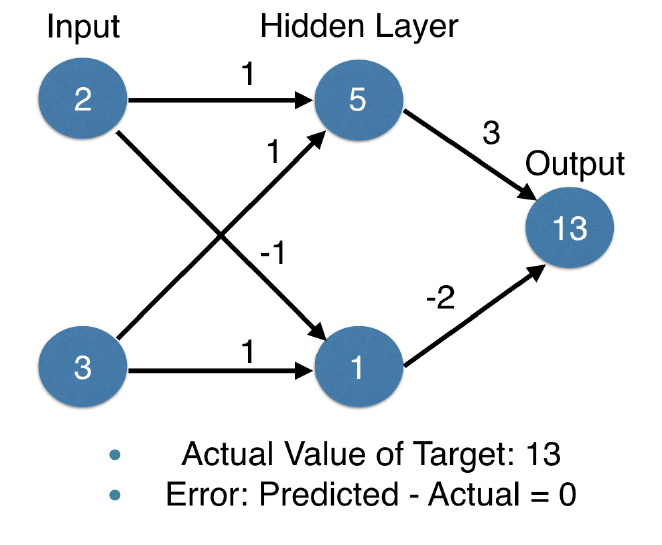
</div>

In [13]:
# Let's recreate this situation

input_data = np.array([2, 3])
weights_0 = {'node_0': [1, 1],
             'node_1': [-1, 1],
             'output': [2, -1]
            }

# The actual target value
target_actual = 13

# We can calculate the prediction
output_0 = basic_nn(input_data, weights_0)

# Calculate error: error_0
error_0 = output_0 - target_actual

print(error_0)

-4


In [14]:
# We can modify the weights to obtain 0 error
weights_1 = {'node_0': [1, 1],
             'node_1': [-1, 1],
             'output': [3, -2]
            }

# We can calculate the new prediction
output_1 = basic_nn(input_data, weights_1)

# Calculate error: error_0
error_1 = output_1 - target_actual

print(error_1)

0


In [15]:
# Typical situation is not this simple, we have multiple datapoints, and we cannot simply change the 
# weights simply in a way that makes all the ouputs correct
# In general, to measue how good a change in the weight is, we utilize a loss function, which is
# typically the mean squared error

from sklearn.metrics import mean_squared_error

# Let's say we have 4 input values and the corresponding target values

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

# We have the initial weights and we need to decide whether it makes sense to change to weights_1

weights_0 ={'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

In [16]:
# We can calculate output for the models with the two different models

model_output_0 = []
model_output_1 = []

for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(basic_nn_relu(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(basic_nn_relu(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
# We have higher error for the proposed new weights, so this is not a good way to change
print("Mean squared error with weights_0:",mse_0)
print("Mean squared error with weights_1:",mse_1)

Mean squared error with weights_0: 37.5
Mean squared error with weights_1: 49.890625


In order to determine how to change the weights, there are various algorithms, the most basic and widely used one (and providingthe basic idea for more complex optimization algorithms) is Gradient Descent. We will not work out the implementation of that in detail, you may find more details about this in the DataCamp course or the Mining of Massice Datasets book.